# Online social platform model

7 May 2020

We present here a review for the online social platform model for proceed to use this elements to formulate the OSP portfolio optimization problem.

$\textbf{Model}$: We analyse the influence of users in a generic online social platform.

In such a platform, there are $N > 2$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M > 0$ and the Wall of size $K >0$. Furthermore, each user has a set of leaders, $L^{(n)}$, and she/he can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously by insertion of posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their generation by the user-author index $(n)$.

$\textbf{Assumptions}$: The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users.

We define the influence of user $i$ on user $n$, $q^{(n)}_i$, as the steady-state probability that a post found on the Wall of user $n$ is of label $i$, i.e., has been originally created by user $i$. Note that these probabilities are performance parameters that will be the output of the developed models. We propose the following metric of influence, $\Psi_i =\frac{1}{N-1} \sum_{n \not=i} q^{(n)}_i$.

### Linear System solution (Theorem 2 from paper)

Linear System solution (Theorem 2 from paper)
To find the values of the steady-state vectors $P_{vec}(i)$ and $Q_{vec}(i)$, one needs to solve the following linear system (formulas $(12)-(13)$):

$(12) \space P_{vec}(i) = AP_{vec}(i) + b(i)$

$(13) \space Q_{vec}(i) = C_{vec}(i) + d(i).$

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

### Implementation
$\textbf{Notes}$: For the implementation, we first generate an input from graphs of specific form. We choose here to generate a Erdos-Renyi graph, Albert-Barabasi granp, Ring graph and a Grid graph. Furthermore, we allow the choice of self-posting and re-posting rates.

The implementation will fill in the matrices A,C and the vectors b,d for any user and perform the matrix calculations presented in the paper. The methods to solve can be found as Theorem 3 and Theorem 4. The time of convergence of (M1) and (M2) depends on the number of user as well as the maximum number of iterations and the epsilon in the convergence criterion $||p_{neq}-p_{old}||_{\infty}<eps$. We set: $it =1000$ and $eps = 0.0001$ by default. Note that the implementation of (M2) is not sparse and the simple version outperforms (M1) in examples where the graph structure is non-symmetric.

Finally, we found through the method desired by the user (M1) or (M2) the vector of steady states probabilities for the Newsfeeds, for the Walls and the vector of influences for each user.

###### As an observation, we will print the results obtained. However, we will later hide the print functions from execution because we will load the functions defined here in the OSP portfolio optimization problem.

In [1]:
%pylab inline
import math
import numpy as np
import time
import networkx as nx
from numpy import inf

Populating the interactive namespace from numpy and matplotlib


## Input Graphs
We first would like to generate the input graphs for our Social platform.

We propose four graph categories: (I) Erdos-Renyi Graph, (II) Albert-Barabasi Graph, (III) Ring Graph, (IV) Grid Graph.

For each graph, we need to define: (1) number of users $N$, (2) self- and re-post activity rate N-vectors, $L_{vec}$ and $M_{vec}$ (3) Leader graph (either NxN or list), (4) the cost per post for each user and (5) the user $i$ who orchestrates the advertising campaign.

For the special cases Erdos-Renyi, Albert-Barabasi and Ring Graph, a probability $pr$ in Erdos-Renyi graph $G(N,p)$, the number of edges $m$ to attach from a new node to existing nodes in the Barabasi-Albert model and a radius $R$ should also be defined, which determines the number of leaders per user.

In [2]:
# Number of users in Social graph, pr probability in Erdos-Renyi graph G(N,pr) and m is the number of edges to attach from a new node to existing nodes in the Barabasi-Albert model
N=25
m=3
pr=.2

### I. Erdos-Renyi Graph

We fix the probability $pr$ and a Erdos-Renyi graph $G(N,pr)$ is constructed. Namely by connecting nodes randomly with directed edges where each edge is included in the graph with probability $pr$ independent from every other directed edge. 

Note: In this implementation we assume users indexed from $n=0,...N-1$, and we use lists, so that the entry e.g. $R_{vec}[0]$ refers to the number of leaders for user "0", and similarly $R_{vec}[n]$ for user "n".

In [3]:
#Graphs------------------------------------------------------------------------------------------------------------------------
#Erdos-Renyi Graph-------------------------------------------------------------------------------------------------------------
def erdosL_graph(N,p):
    Lead = [list() for j in range(N)]
    for n in range(0,N):
        for m in range(0,N):
            if n!=m:
                aux=np.random.binomial(1,p)
                if aux==1:
                    Lead[n].append(m)
    return Lead
#Erdos Renyi graph with our hypotheses (each user has at least one leader)
def erdos_graph(N,p): 
    Lead = erdosL_graph(N,p)
    for n in range(0,N):
        if len(Lead[n])==0:
            return erdos_graph(N,p)
    return Lead

In [4]:
Lead=erdos_graph(N,pr) #We select graph structure
#print("Lead of Erdos-Renyi graph=",Lead)

Lead of Erdos-Renyi graph= [[9, 10, 14, 18, 20], [2, 4, 6, 9, 14, 15, 17, 21, 22, 24], [9, 10, 12, 13, 17, 18, 20, 24], [0, 6, 18], [3, 8, 13, 14, 15, 23], [1, 6, 10, 11, 12, 23], [1, 3, 4, 10, 16, 17, 22], [6, 13, 14, 17, 22], [0, 1, 3, 6, 9, 11, 13, 16, 23], [5, 13, 16, 20, 22], [3, 7, 14, 23], [1, 5, 20, 21], [2, 21], [9, 10, 14, 18, 22, 24], [0, 4, 11, 16, 17, 23], [9, 10, 11, 23], [9, 11, 20, 21, 22], [9, 12, 19, 21], [9, 16, 19, 24], [6, 7, 11, 21, 23], [2, 9, 13, 16, 18], [14, 16, 17, 19], [1, 2, 6, 11, 16], [2, 10, 18], [2, 3, 5, 9, 12, 13, 16, 21, 22]]


We will now draw the produced directed Leader Graph.

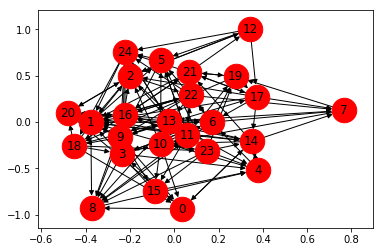

In [5]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = Lead[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### II. Albert-Barabasi Graph

In the Albert-Barabasi graph, we begin with an initial complete network of $m$ nodes and $N-m$ new nodes are added to the network one at a time. Each new node is connected to $m$ existing nodes with a bi-directed edge and a probability that is proportional to the number of links that the existing nodes already have, namely $\frac{\text{degree}_i}{\sum_{j \not=i} \text{degree}_j}$ with $\text{degree}_i$ the degree of user $i$. Then, heavily linked nodes tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. 

In [6]:
#Albert-Barabasi graph---------------------------------------------------------------------------------------------------------
def barabasi_albert(n, m):
    # initialise with a complete graph on m vertices
    Lead=[list() for j in range(N)]
    neighbours=[set(range(m)) - {i} for i in range(m)]
    degrees=[m-1 for i in range(m)]
    for i in range(m, n):
        #Set of new neighbours of user i
        n_neighbours={i for _, i in sorted([(np.random.exponential(w), i) for i, w in enumerate(degrees)])[:m]}
        # add node with back-edges
        neighbours.append(n_neighbours)
        degrees.append(m)
        # add forward-edges
        for j in n_neighbours:
            neighbours[j].add(i)
            degrees[j] += 1
    for i in range(N):
        for j in range(N):
            if j in neighbours[i]:
                Lead[i].append(j)
    return Lead

In [7]:
Lead=barabasi_albert(N, m) #We select graph structure
#print("Lead of Albert-Barabasi graph=",Lead)

Lead of Albert-Barabasi graph= [[1, 2, 3, 4, 5, 13, 14, 21], [0, 2, 3, 7, 8, 10, 16], [0, 1, 3, 4, 10, 11, 12, 15], [0, 1, 2, 4, 5, 6, 14], [0, 2, 3, 5, 6, 8, 9, 13], [0, 3, 4, 6, 7, 18, 20], [3, 4, 5, 7, 8, 16, 19], [1, 5, 6, 9, 10, 12], [1, 4, 6, 9, 11, 18, 21, 23], [4, 7, 8, 11, 18], [1, 2, 7, 12, 17], [2, 8, 9, 15], [2, 7, 10, 13, 15, 16, 24], [0, 4, 12, 14, 19, 20], [0, 3, 13, 17], [2, 11, 12, 17], [1, 6, 12, 19], [10, 14, 15, 24], [5, 8, 9, 21, 22, 23], [6, 13, 16, 20, 22], [5, 13, 19, 22], [0, 8, 18, 24], [18, 19, 20, 23], [8, 18, 22], [12, 17, 21]]


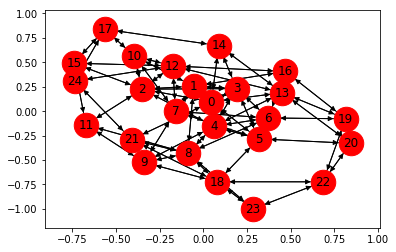

In [8]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = Lead[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### III. Ring Graph
we set the symmetric ring graph. Each node follows $R$ users at his right and left, so that in total she/he has $2R$ leaders. Obviously, $2R<N$.

In [9]:
#Ring graph-------------------------------------------------------------------------------------------------------------------
# Inout Radius
# Defines radius in ring for each user
# Radius scenario 1: random with maximum 2R < N
Rhigh = int(N/2)
Rvec1 = np.random.randint(0,Rhigh+1,N)
#
# Radius scenario 2: all users same radius R
R = 2
Rvec2 = R*np.ones(N)
Rvec2 = Rvec2.astype(int)
#
# Radius scenario 3: all users same radius R except user "0"
Rvec3 = list(Rvec2)
Rvec3[0] = 2
Rvec3 = np.asarray(Rvec3)
Rvec3 = Rvec3.astype(int)
#print("Rvec1=",Rvec1,"\n")
#print("Rvec2=",Rvec2,"\n")
#print("Rvec3=",Rvec3,"\n")

Rvec1= [ 8  3  9 10  6  7  1  8  3  3  4 10  9  5  3  7 12  4 12  3  7  8 12  6
  5] 

Rvec2= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Rvec3= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 



In [10]:
def ring_graph(N, Rvec, lead=1, sym=1):
    # Produces a list of Leaders, i.e. Lead[j] is the list of leaders for node j.
    #
    # The function allows for some variations:
    # Option lead =1: Vector Rvec is for leaders (Rvec[n] is the list of leaders for node n)
    # Option lead =0: Vector Rvec is for followers (Rvec[n]) is the list of followers for node n)
    #
    # Option sym =1: case of symmetric leaders R right and R left of a user
    # Option sym =0: non-symmetric leaders 2R at the right only.
    #
    Lead = list()
    #
    if lead==1 and sym==1:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==1 and sym==0:
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            Lead.append(f)
    elif lead==0 and sym==1:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            f.extend((j-(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    elif lead==0 and sym==0:
        for j in range(0,N):
            f = list()
            Lead.append(f)
        for j in range(0,N):
            f = list()
            f.extend((j+(np.arange(Rvec[j])+1))%N)
            for n in range(len(f)):
                Lead[f[n]].append(j)
    return Lead

In [11]:
LeadRing = ring_graph(N,Rvec1,lead=1,sym=1)
#print("Rvec=",Rvec1)
#print("LeadRing=",LeadRing)

Rvec= [ 8  3  9 10  6  7  1  8  3  3  4 10  9  5  3  7 12  4 12  3  7  8 12  6
  5]
LeadRing= [[1, 2, 3, 4, 5, 6, 7, 8, 24, 23, 22, 21, 20, 19, 18, 17], [2, 3, 4, 0, 24, 23], [3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 0, 24, 23, 22, 21, 20, 19, 18], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2, 1, 0, 24, 23, 22, 21, 20, 19, 18], [5, 6, 7, 8, 9, 10, 3, 2, 1, 0, 24, 23], [6, 7, 8, 9, 10, 11, 12, 4, 3, 2, 1, 0, 24, 23], [7, 5], [8, 9, 10, 11, 12, 13, 14, 15, 6, 5, 4, 3, 2, 1, 0, 24], [9, 10, 11, 7, 6, 5], [10, 11, 12, 8, 7, 6], [11, 12, 13, 14, 9, 8, 7, 6], [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [13, 14, 15, 16, 17, 18, 19, 20, 21, 11, 10, 9, 8, 7, 6, 5, 4, 3], [14, 15, 16, 17, 18, 12, 11, 10, 9, 8], [15, 16, 17, 13, 12, 11], [16, 17, 18, 19, 20, 21, 22, 14, 13, 12, 11, 10, 9, 8], [17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4], [18, 19, 20, 21, 16, 15, 14, 13], [19, 20, 21, 22, 23, 24, 0, 1, 2, 3, 4, 5, 17, 16, 15, 14, 13, 12, 11, 10

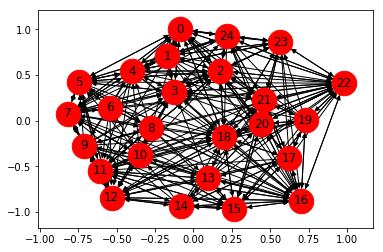

In [12]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = LeadRing[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)

# Uncomment below to Draw
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

### IV. Grid graph
In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [13]:
#Grid graph---------------------------------------------------------------------------------------------------------------------
def grid_graph(N):
    #
    dim1 = math.sqrt(N)
    #
    # Check validity of Grid size
    if np.abs(dim1-int(dim1))>0:
        return print("not valid graph size N\n")
    #
    dim1 = int(dim1)
    #
    # If size is correct, then produce a list of Leaders.
    # Nodes are indexed from top-left ("0") to bottom-right ("N-1")
    # and in each row the indexing increased from left to right.
    #
    Lead = [list() for j in range(N)]
    #
    # Internal nodes with 4 leaders each.
    for n in range(1,dim1-1):
        for m in range(1,dim1-1):
            indx = dim1*n+m
            Lead[indx].extend([dim1*(n+1)+m, dim1*(n-1)+m, dim1*n+m+1, dim1*n+m-1 ])
    # Four vertices with 2 leaders each.
    Lead[0].extend([1, dim1])
    Lead[dim1-1].extend([dim1-2,dim1*2-1])
    Lead[dim1*(dim1-1)].extend([dim1*(dim1-1)+1,dim1*(dim1-2)])
    Lead[N-1].extend([N-2,dim1*(dim1-1)-1])
    # Remaining nodes on the four edges, not vertices.
    # Top
    for m in range(1,dim1-1):
        Lead[m].extend([m-1,m+1,dim1+m])
    # Bottom
    for m in range(1,dim1-1):
        Lead[dim1*(dim1-1)+m].extend([dim1*(dim1-1)+m-1,dim1*(dim1-1)+m+1,dim1*(dim1-2)+m])
    # Left
    for n in range(1,dim1-1):
        Lead[dim1*n].extend([dim1*n+1,dim1*(n-1),dim1*(n+1)])
    # Right
    for n in range(1,dim1-1):
        Lead[dim1*(n+1)-1].extend([dim1*(n+1)-2,dim1*(n)-1,dim1*(n+2)-1])
    return Lead

In [14]:
Lead=grid_graph(N) #We select graph structure
#print("LeadGrid=",Lead)

LeadGrid= [[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9], [6, 0, 10], [11, 1, 7, 5], [12, 2, 8, 6], [13, 3, 9, 7], [8, 4, 14], [11, 5, 15], [16, 6, 12, 10], [17, 7, 13, 11], [18, 8, 14, 12], [13, 9, 19], [16, 10, 20], [21, 11, 17, 15], [22, 12, 18, 16], [23, 13, 19, 17], [18, 14, 24], [21, 15], [20, 22, 16], [21, 23, 17], [22, 24, 18], [23, 19]]


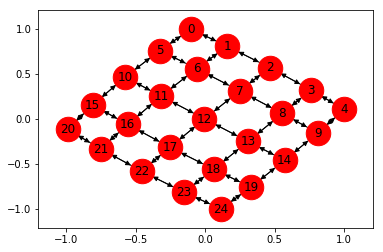

In [15]:
#Gring=nx.DiGraph()
#for n in range(N):
#    ln = list()
#    ln = Lead[n]
#    for j in range(len(ln)):
#        Gring.add_edge(ln[j],n)
#pos=nx.spring_layout(Gring,iterations=100)
#nx.draw_networkx(Gring,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

## General Input

We first define the general input (1),(2) and (3) related to size and activity. So, we could calculate using (M1) or (M2) the influence metric for each user and then we could get the cost per post (4) for each user and get our basic feasible solution 
through the simplex method.

We give three example options for the activity to post and re-post. These are just input examples, and can be chosen arbitrarily, depending on the scenario to be tested.

In [16]:
#General Input (N, Lvec, Mvec)--------------------------------------------------------------------------------------------------
N=200
#print("N=",N,'\n') # network size
# Activity
# Activity Scenario case 1: random activity
Amax = 100 #maximum activity rate in the random choice (case 1)
Lvec1 = np.random.uniform(0,Amax, N)
Mvec1 = np.random.uniform(0,Amax, N)
#
Lvec1 = np.round(Lvec1, 5)
Mvec1 = np.round(Mvec1, 5)
# Activity Scenario case 2: symmetric activity
lam = 1.
mu = 1
Lvec2 = lam*np.ones(N, np.float64)
Mvec2 = mu*np.ones(N, np.float64)
#
# Activity Scenario case 3: asymmetric activity for 1 user
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)
#
#print("Lvec1=",Lvec1,"\n","Mvec1=",Mvec1,"\n")
#print("Lvec2=",Lvec2,"\n","Mvec2=",Mvec2,"\n")
#print("Lvec3=",Lvec3,"\n","Mvec3=",Mvec3,"\n")

N= 200 

Lvec1= [49.97471 86.95927 11.81656 32.65838 52.9182  12.62603 32.32321 84.47907
 28.60778 54.8954  89.61875 98.8807  34.6733  36.67602 88.29266 29.03763
  4.69931  5.86768 67.08962 48.51159 58.58897  5.90412 81.2149  22.12269
 42.58693 75.20755 42.57545 57.59129 77.11871 17.94412 11.08868 94.20753
 67.28374 77.39048 23.4621  26.70857 73.92659 72.71586 52.53755 88.61895
 35.92359 35.8428  68.03247 83.16171 68.68818 50.6123  31.60015 21.31995
 78.08682 44.03252 14.84398 61.38728 56.85532 51.41481 24.89473 21.39558
 45.32048  1.1225   5.53617 90.16205 14.26558 97.11593 89.65856  7.69147
 26.89526  1.15805 24.36512 11.64409 12.23191 67.18201 92.35605 33.71311
 93.8677  64.9886  61.36603  5.13969 76.63882 17.61582 43.55169 42.36326
 83.23675 24.28394 76.87383 86.33397 41.80353 25.7179  61.30182 70.2436
 71.60744 27.95074 79.15284 15.82347 25.03341 22.89029 98.10115 73.81511
 29.74114 54.55344  6.41923 76.7405   6.14654 96.40024 36.62039 72.08773
 78.2315  80.25165 25.13636 50.1425 

#### Input parameter

The input chosen:

In [17]:
#print("N=",N,'\n')
Lvec = Lvec1
#print("Lvec=",Lvec,'\n')
Mvec = Mvec1
#print("Mvec=",Mvec,'\n')

N= 200 

Lvec= [49.97471 86.95927 11.81656 32.65838 52.9182  12.62603 32.32321 84.47907
 28.60778 54.8954  89.61875 98.8807  34.6733  36.67602 88.29266 29.03763
  4.69931  5.86768 67.08962 48.51159 58.58897  5.90412 81.2149  22.12269
 42.58693 75.20755 42.57545 57.59129 77.11871 17.94412 11.08868 94.20753
 67.28374 77.39048 23.4621  26.70857 73.92659 72.71586 52.53755 88.61895
 35.92359 35.8428  68.03247 83.16171 68.68818 50.6123  31.60015 21.31995
 78.08682 44.03252 14.84398 61.38728 56.85532 51.41481 24.89473 21.39558
 45.32048  1.1225   5.53617 90.16205 14.26558 97.11593 89.65856  7.69147
 26.89526  1.15805 24.36512 11.64409 12.23191 67.18201 92.35605 33.71311
 93.8677  64.9886  61.36603  5.13969 76.63882 17.61582 43.55169 42.36326
 83.23675 24.28394 76.87383 86.33397 41.80353 25.7179  61.30182 70.2436
 71.60744 27.95074 79.15284 15.82347 25.03341 22.89029 98.10115 73.81511
 29.74114 54.55344  6.41923 76.7405   6.14654 96.40024 36.62039 72.08773
 78.2315  80.25165 25.13636 50.1425  

Choose between our graphs:

In [18]:
# In case we choose Albert-Barabasi:
#Lead = barabasi_albert(N, m)
# In case we choose Ring:
#Lead = ring_graph(N,Rvec,lead=1,sym=1)
# In case we choose Grid:
#Lead = grid_graph(N)
#
# In case we choose Erdos-Renyi:
Lead = erdos_graph(N,pr)
#print("Lead=",Lead)

Lead= [[2, 7, 12, 30, 33, 38, 41, 48, 57, 68, 77, 78, 83, 84, 88, 91, 93, 100, 102, 106, 111, 131, 139, 145, 149, 153, 166, 168, 174, 175, 181, 182, 190, 195, 198], [4, 5, 7, 12, 14, 16, 19, 25, 30, 33, 43, 45, 49, 54, 55, 56, 60, 73, 81, 99, 105, 107, 109, 120, 126, 127, 135, 136, 145, 156, 159, 162, 169, 172, 175, 181, 187, 191, 193, 197], [8, 9, 10, 11, 12, 15, 17, 18, 22, 24, 26, 33, 39, 43, 46, 56, 57, 61, 68, 70, 74, 82, 83, 87, 93, 96, 100, 105, 106, 128, 137, 140, 142, 149, 154, 160, 166, 171, 174, 175, 181, 183, 184, 191, 194, 196, 198], [8, 9, 11, 18, 19, 21, 25, 28, 31, 35, 39, 41, 42, 46, 50, 54, 78, 84, 85, 88, 93, 94, 95, 100, 103, 104, 113, 123, 129, 132, 146, 147, 155, 159, 160, 161, 162, 163, 164, 165, 168, 173, 174, 175, 178, 189, 194, 196], [0, 17, 18, 23, 24, 26, 28, 31, 35, 39, 40, 42, 50, 63, 64, 69, 72, 81, 101, 103, 107, 108, 115, 124, 135, 136, 147, 153, 158, 162, 164, 172, 173, 174, 175, 178, 179, 181, 186, 188, 189], [25, 27, 38, 44, 45, 51, 53, 57, 59, 61, 6

From the Linear System solution, it is necessary to first populate the matrices $A$ and $C$, which are relevant for any solution process of the system.

In [19]:
def fill_A(N,Lvec,Mvec,Lead):
    A = np.zeros((N,N))
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    Som = np.zeros(N)
    for j in range(N):
        Som[j] = sum(Lvec[Lead[j]]+Mvec[Lead[j]])
        for n in range(len(Lead[j])):
            k = Lead[j][n]
            A[j,k] = Mvec[k]/Som[j]
    return A

In [20]:
A= fill_A(N,Lvec,Mvec,Lead)
#print(A)

[[0.         0.         0.01091192 ... 0.         0.00062111 0.        ]
 [0.         0.         0.         ... 0.00350848 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00046058 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00796795 0.         0.00909863 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [21]:
def fill_C(N,Lvec,Mvec):
    C = np.zeros((N,N))
      # C is diagonal.
        #
    for j in range(N):
        if Lvec[j]+Mvec[j]>0:
            C[j][j] = Mvec[j]/(Lvec[j]+Mvec[j])
    return C

In [22]:
C = fill_C(N,Lvec,Mvec)
#print(C)

[[0.40539963 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01685871 0.         ... 0.         0.         0.        ]
 [0.         0.         0.7670441  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.52353305 0.         0.        ]
 [0.         0.         0.         ... 0.         0.05854795 0.        ]
 [0.         0.         0.         ... 0.         0.         0.71083535]]


In [23]:
def fill_bi(i,N,Lvec,Mvec,Lead):
    bi = np.zeros(N)
    for j in range(N):
        if i in Lead[j]:
            bi[j] = Lvec[i]/sum(Lvec[Lead[j]]+Mvec[Lead[j]])
    return bi

In [24]:
bi = fill_bi(0,N,Lvec,Mvec,Lead)
#print(bi)

[0.         0.         0.         0.         0.01136522 0.
 0.         0.01264643 0.         0.01256896 0.         0.
 0.         0.01515682 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00992483 0.         0.         0.
 0.         0.         0.01156439 0.         0.         0.
 0.01810705 0.         0.01292642 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01071895 0.         0.01286427 0.         0.         0.
 0.         0.         0.01443799 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01207392 0.01373587 0.         0.
 0.         0.         0.         0.01153821 0.         0.
 0.01839214 0.01661588 0.         0.         0.         0.01112264
 0.         0.         0.         0.01308954 0.         0.
 0.01623445 0.         0.         0.         0. 

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [25]:
def fill_di(i,N,Lvec,Mvec):
    di = np.zeros(N)
    di[i] = Lvec[i]/(Lvec[i]+Mvec[i])
    return di

In [26]:
di = fill_di(0,N,Lvec,Mvec)
#print(di)

[0.59460037 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point. There are two methods:

#### (M1) the first method is based on matrix inversion (Theorem 3)

$p_i = (I_N-A)^{-1}b_i$, and

$q_i = Cp_i + d_i$.

So, we first solve the system for a specific label $i$, for the solution of all labels $i=1,...,N$ one needs to calculate the matrix inverse only once and the vector $bi$ has very few non-zero entries, and finally we return two matrices with the elements $p_i$, $q_i$ and one vector with the elements $\Psi_i$.

In [27]:
#Closed-form algorithm----------------------------------------------------------------------------------------------------------
def InvM(N,Lvec,Mvec,Lead):    
    # Newsfeed
    P = np.zeros((N,N))
    A = np.zeros((N,N))
    A = fill_A(N,Lvec,Mvec,Lead)
    IN = np.eye(N)
    invIA = np.linalg.inv(IN-A) 
    for i in range(N):
        #if i%100 ==1:
            #print(i)
        bi = fill_bi(i,N,Lvec,Mvec,Lead)
        # 1) Very slow method that needs to calculate every time the inverse:
        #P[:,i] = pi_method1(i,N,Lvec,Mvec,Lead) 
        # 2) Fast method that calculates the inverse just once:
        # P[:,i] = (invIA).dot(bi)
        # 3) Faster method that calculates the inverse once, AND adds only the non-zero elements of bi vector.
        iN0 = np.nonzero(bi)[0]
        P[:,i] = invIA[:,iN0].dot(bi[iN0])   
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    Q = C.dot(P) + D
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [28]:
[P1,Q1,Psi1] = InvM(N,Lvec,Mvec,Lead)
#print("P1=",P1,"\n")
#print("Q1=",Q1,"\n")
#print("Psi1=",Psi1,"\n")

P1= [[0.00426293 0.00569005 0.00416589 ... 0.00058623 0.01313299 0.00142486]
 [0.00393985 0.00654331 0.0008018  ... 0.00387688 0.00213702 0.00168981]
 [0.00344731 0.00535086 0.00061191 ... 0.00060047 0.00953908 0.00176351]
 ...
 [0.00400559 0.00368183 0.00043618 ... 0.00068865 0.00237693 0.00098254]
 [0.01537449 0.00472374 0.003526   ... 0.00062727 0.00189949 0.00137566]
 [0.00350786 0.00451947 0.00069262 ... 0.0007533  0.00204921 0.00199078]] 

Q1= [[5.96328556e-01 2.30674424e-03 1.68885016e-03 ... 2.37658319e-04
  5.32411015e-03 5.77638916e-04]
 [6.64207754e-05 9.83251603e-01 1.35173321e-05 ... 6.53592007e-05
  3.60274706e-05 2.84880709e-05]
 [2.64423514e-03 4.10434414e-03 2.33425267e-01 ... 4.60589568e-04
  7.31689373e-03 1.35269123e-03]
 ...
 [2.09706105e-03 1.92755825e-03 2.28352168e-04 ... 4.76827475e-01
  1.24440269e-03 5.14390511e-04]
 [9.00144976e-04 2.76565372e-04 2.06440223e-04 ... 3.67256547e-05
  9.41563260e-01 8.05420251e-05]
 [2.49351065e-03 3.21260092e-03 4.92341898e-04

#### (M2) The second method is based on the fixed point convergence (Theorem 4)

$p_i(t+1) = A.p_i(t) + b_i$, for $t\rightarrow\infty$.

This should converge to $p_i$. Once it is found, the Wall steady-state can be calculated

$q_i = C.p_i + d_i$.

We first solve the fixed point for a specific label $i$, so we define the matrix composed by the fixed point covergence for each $i$ and return two matrices with the elements $p_i$, $q_i$ and one vector with the elements $\Psi_i$.

In [29]:
#Fixed-point algorithm----------------------------------------------------------------------------------------------------------
def PM(N,Lvec,Mvec,Lead,it = 1000, eps = .0001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    # Newsfeed
    P_old = np.zeros((N,N))
    B = np.zeros((N,N))
    for i in range(N):
        # Slow: repeat pi_method2 for all i
        # P[:,i] = pi_method2(i,N,Lvec,Mvec,Lead,it = 1000, eps = .0001)
        # Fast: Do one iteration for matrix P and B.
        B[:,i] = fill_bi(i,N,Lvec,Mvec,Lead)
    P0 = np.ones((N,N))/N
    P_new = list(P0)
    P_new = np.asarray(P_new)
    t = 0
    while (t<it) & (np.linalg.norm(P_old-P_new,ord=inf)>eps):
        P_old = list(P_new)
        P_old = np.asarray(P_old)
        P_new = list(A.dot(P_old)+B)
        P_new = np.asarray(P_new)
        t += 1
    P = list(P_new)
    P = np.asarray(P)
    # Wall
    D = zeros((N,N))
    for i in range(N):
        D[:][i] = fill_di(i,N,Lvec,Mvec)  
    C = fill_C(N,Lvec,Mvec)
    Q = C.dot(P) + D
    # Influence metric
    Psi = (sum(Q,0) - Q.diagonal())/(N-1)
    return [P,Q,Psi]

In [30]:
[P2,Q2,Psi2] = PM(N,Lvec,Mvec,Lead)
#print("P2=",P2,"\n")
#print("Q2=",Q2,"\n")
#print("Psi2=",Psi2,"\n")

P2= [[0.00426254 0.0056893  0.00416659 ... 0.00058697 0.01313313 0.00142531]
 [0.00393946 0.00654256 0.0008025  ... 0.00387762 0.00213716 0.00169026]
 [0.00344697 0.00535022 0.00061251 ... 0.0006011  0.00953919 0.00176389]
 ...
 [0.00400527 0.00368121 0.00043676 ... 0.00068926 0.00237704 0.00098291]
 [0.01537414 0.00472305 0.00352665 ... 0.00062795 0.00189961 0.00137607]
 [0.00350749 0.00451875 0.0006933  ... 0.00075401 0.00204934 0.00199122]] 

Q2= [[5.96328400e-01 2.30644184e-03 1.68913377e-03 ... 2.37956188e-04
  5.32416460e-03 5.77819751e-04]
 [6.64142627e-05 9.83251591e-01 1.35291566e-05 ... 6.53716197e-05
  3.60297410e-05 2.84956105e-05]
 [2.64398124e-03 4.10385262e-03 2.33425728e-01 ... 4.61073727e-04
  7.31698224e-03 1.35298516e-03]
 ...
 [2.09689339e-03 1.92723368e-03 2.28656575e-04 ... 4.76827795e-01
  1.24446113e-03 5.14584607e-04]
 [9.00124156e-04 2.76525069e-04 2.06478023e-04 ... 3.67653548e-05
  9.41563268e-01 8.05661269e-05]
 [2.49324559e-03 3.21208780e-03 4.92823144e-04

The time of convergence of (M2) depends on the maximum number of iterations and the epsilon in the convergence criterion

The two methods bring the same result. For (M1) the inverse is calculated only once for all $i$, however, it can be computetionally very hard to calculate exactly the inverse as the size $N$ of the network increases. (M2) The fixed point iteration can be performed for the matrix $P$ using matrix $B$ containing all vectors $b_i$, hence one iteration is enough (although this will enforce that convergence should be guaranteed for all users $i$, it is thus worse-case criterion). One needs to find the trade-off between calculating the inverse and iterating the fixed point process, to decide what is faster.

## Reference

[1]. Giovanidis, A., Baynat, B., & Vendeville, A. (2019, April). Performance analysis of online social platforms. In IEEE INFOCOM 2019-IEEE Conference on Computer Communications (pp. 2413-2421). IEEE.